In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

# Feature Engineering

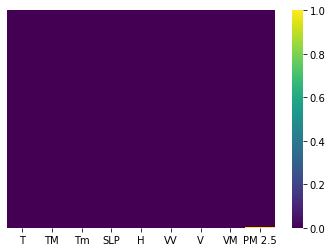

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Interpretation:
Using heatmaps to see null valuesand we can see a yello bar at the bottom right
Removing the null values using dropna()

In [7]:
df=df.dropna()

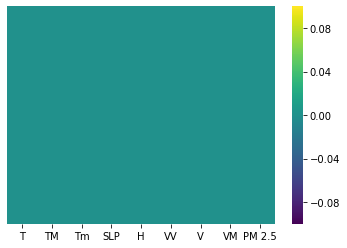

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Interpretation:
After removing the null values ,the above heatmap looks even with no null value

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [10]:
X.shape


(904, 8)

In [11]:
y.shape

(904,)

# Train test splitting

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
X_train.shape

(632, 8)

In [14]:
y_train.shape

(632,)

In [15]:
X_test.shape

(272, 8)

In [16]:
y_test.shape

(272,)

# LinearRegression

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [18]:
linearregressor=LinearRegression()
score=cross_val_score(linearregressor,X,y,cv=4,scoring='neg_mean_squared_error')
score.mean()

-3576.1976560478724

# RidgeRegression

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [20]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-1,1,5,20,35,40,50]}
ridgeregressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=4)
ridgeregressor.fit(X,y)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.1, 1, 5, 20,
                                   35, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [21]:
ridgeregressor.best_params_


{'alpha': 50}

In [22]:
ridgeregressor.best_score_

-3501.974141971

Interpretation:
    
    We are calculating the score which is the error that needs to be minimum and approching 0
    
    The value of minimum error in Ridge Regression is -3501.97 which is better than Linear Regression which is -3576.19

# Lasso Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [24]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-1,1,5,20,35,40,50]}
lassoregressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=4)
lassoregressor.fit(X,y)
print(lassoregressor.best_params_)
print(lassoregressor.best_score_)

{'alpha': 5}
-3493.719817078534


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1095760.4743433634, tolerance: 479.7236294065163
  positive)
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1090239.1487247592, tolerance: 469.9631910708707
  positive)
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1053173.5894228911, tolerance: 455.5011588627832
  positive)
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

In [34]:
lassoregressor.score(X_test,y_test)

-3472.7502103940897

# Model Evaluation

In [26]:
print('Lasso regression score:{}'.format(lassoregressor.best_score_))
print('Ridge regression score:{}'.format(ridgeregressor.best_score_))
print('Linear regression score:{}'.format(score.mean()))

Lasso regression score:-3493.719817078534
Ridge regression score:-3501.974141971
Linear regression score:-3576.1976560478724


Interpretaion:
    From the above scores we can see that Lasso Regression has the minimum error.

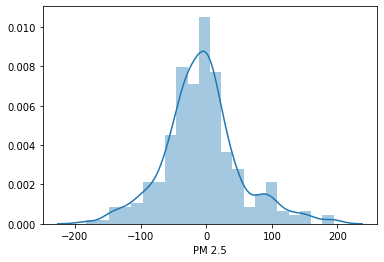

In [27]:
prediction=lassoregressor.predict(X_test)
sns.distplot(y_test-prediction)

Interpretation:From the above graph we can see a almost normal distributed curve which determines that the model is good.

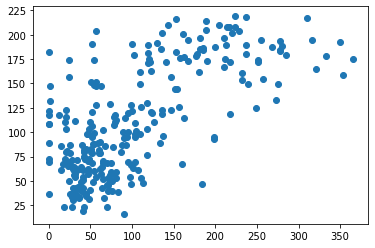

In [29]:
plt.scatter(y_test,prediction)

Interpretation:From the above graph we can see a a pattern in the scatterplot

# Regression Evaluation Metrics

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 43.19609289211149
MSE: 3472.7502103940897
RMSE: 58.93004505677973


# Save the Model:

In [31]:
import pickle

In [32]:
file=open('lassoregression_model.pkl','wb')

pickle.dump(lassoregressor,file)
